In [431]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [491]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [492]:
df


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

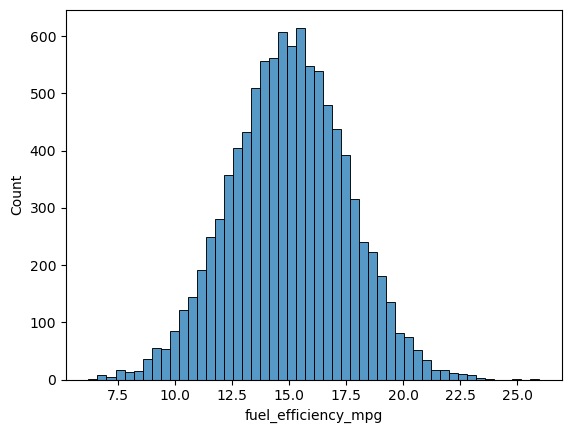

In [493]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

# it does not have long tail

In [494]:
# check for missing values

df.isnull().sum()

# horsepower

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [495]:
# Setting up the validation framework

# 1. Determine sizes
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# 2. Shuffle dataset
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# # 3. Split indices
# idx_train = idx[:n_train]
# idx_val = idx[n_train:n_train + n_val]
# idx_test = idx[n_train + n_val:]

# 4. Create splits
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_train]
df_train = df.iloc[n_val + n_train:]




In [496]:
y_train = df_train.fuel_efficiency_mpg.values
y_test = (df_test.fuel_efficiency_mpg.values)
y_val = (df_val.fuel_efficiency_mpg.values)

In [497]:
# remove fuel_efficiency_mpg from all frameworks
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [498]:
len(df_train), len(df_val), len(df_test)

(1940, 1940, 5824)

In [499]:
# Find horse power median

df['horsepower'].median()

149.0

In [500]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors'],
      dtype='object')

In [501]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

X_train_zero = df_train[base].fillna(0).values
X_train_mean = df_train[base].fillna(df_train[base].mean()).values

In [502]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [503]:
W0, W = train_linear_regression(X_train_zero, y_train)

In [504]:
y_pred = W0 + X_train_zero.dot(W)

y_pred

array([14.9582524 , 14.04721258, 12.32262483, ..., 17.06591658,
       15.60539663, 15.44017407])

In [505]:
def rmse (y, y_pred):
    error = y - y_pred
    sq_error = error **2
    mse = sq_error.mean()
    rmse = np.sqrt(mse)
    return rmse

In [506]:
rmse(y_train, y_pred)

0.5104311792141292

In [507]:
X_val = df_val[base].fillna(0).values

In [508]:
y_pred = W0 + X_val.dot(W)
rmse(y_val, y_pred)

0.5137576822780937

In [509]:
# with mean

W0, W = train_linear_regression(X_train_mean, y_train)

In [510]:
y_pred = W0 + X_train_mean.dot(W)

In [511]:
rmse(y_train, y_pred)

0.45496657710641725

In [512]:
y_pred = W0 + X_val.dot(W)
rmse(y_val, y_pred)

0.6146727525042699

In [513]:
# Regularization

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [514]:
# Finding the best regularization parameter
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0,w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, round(score, 2))

0 24.02272654667886 0.51
0.01 16.411829674892964 0.52
0.1 4.261283007527979 0.52
1 0.5070887321483477 0.52
5 0.10316556860555248 0.52
10 0.051697403030500785 0.52
100 0.005186312596354189 0.52


In [518]:
# Question 5

d_0 = df.sample(frac=1, random_state=0).reset_index(drop=True)
d_1 = df.sample(frac=1, random_state=1).reset_index(drop=True)
d_2 = df.sample(frac=1, random_state=2).reset_index(drop=True)
d_3 = df.sample(frac=1, random_state=3).reset_index(drop=True)
d_4 = df.sample(frac=1, random_state=4).reset_index(drop=True)
d_5 = df.sample(frac=1, random_state=5).reset_index(drop=True)
d_6 = df.sample(frac=1, random_state=6).reset_index(drop=True)
d_7 = df.sample(frac=1, random_state=7).reset_index(drop=True)
d_8 = df.sample(frac=1, random_state=8).reset_index(drop=True)
d_9 = df.sample(frac=1, random_state=9).reset_index(drop=True)


In [544]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    # Split data 60% / 20% / 20%
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)  # 0.25 * 0.8 = 0.2

    # Prepare training and validation sets
    X_train = df_train[base].fillna(0).to_numpy()
    y_train = df_train[target].to_numpy()

    X_val = df_val[base].fillna(0).to_numpy()
    y_val = df_val[target].to_numpy()

    # Train model (no regularization)
    w0, w = train_linear_regression(X_train, y_train)

    # Predict on validation data
    y_pred = w0 + X_val.dot(w)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append(rmse)

# Compute the standard deviation of all RMSE scores
std = np.std(scores)

print("RMSE scores:", scores)
print("Standard deviation:", round(std, 3))


RMSE scores: [0.5283924540020456, 0.522328165378679, 0.5158155638158062, 0.5119014371616938, 0.5199771701900981, 0.5256290281649647, 0.50713519971678, 0.5221709540040442, 0.5156419234698427, 0.5074547645998672]
Standard deviation: 0.007


In [545]:
# Define the random seed and split ratios
seed = 9

# Step 1: Split into full_train (80%) and test (20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

# Step 2: Split full_train into train (60%) and validation (20%)
# 0.25 × 0.8 = 0.2 → means 25% of full_train will become validation
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

# Step 3: Combine train and validation into one dataset
df_train_full = pd.concat([df_train, df_val]).reset_index(drop=True)

In [546]:
X_train_full = df_train_full[base].fillna(0).values
y_train_full = df_train_full[target].values

In [554]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [555]:
X_test = df_test[base].fillna(0).values
y_test = df_test[target].values

In [556]:
W0, W = train_linear_regression_reg(X_train_full, y_train_full, r= 0.001)

In [557]:
y_pred.shape

(1941,)

In [560]:
# y_pred = W0 + X_test.dot(W)
# rmse(y_pred, y_test)

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

rmse


0.5210537420351515